# GRASP Beam Analysis

## Introduction

**Goal**: Study the effect of deformations and position erros in geometric parameters of BINGO optics for the Beam quality.

**Method**: We vary the position of the feed w.r.t. translation and rotations and the position of the secondary w.r.t. translations, obtaining the beam pattern with GRASP, using the notebook make_dataset.

**Analysis**: We construct a handful of metrics to analyze the quality of Beam and discuss the results.

### Geometry

![GRASP](./xzcut.png)

![GRASP](./GRASP_VIEW.png)

 - Translations and Rotation of the feed wrt to the coordinate system of the central feed. Blue axis is Z, red axis is X.
 - Translations of the secondary w.r.t. the coordinate system in the centre of the figure, where the eletric field is calculated.

### Efficiency Metrics

We calculate a number of metrics in order to describe the beam:

- Directivity (dB):
$$D_{max} = 10 \log_{10} \frac{4 \pi \Vert E^2\Vert_{max}}{\iint \Vert E^2\Vert d\Omega}$$

- Main Beam Efficiency (spillover)
$$\eta_{MB} = \frac{\iint_{\mathrm{MB}} \Vert E^2\Vert d\Omega}{\iint \Vert E^2\Vert d\Omega}$$


- GRASP spill over calculation (not used in dataframes).

$$ \mathrm{\eta_{Spillover-dB}} = 10 \log_{10} \frac{4\pi}{- \iint_S d\vec S\cdot \left(\frac{1}{2} \mathrm{Re}(\vec E \times \vec H^*\right)}$$

## Inicialização

In [1]:
import os
import sys
import glob
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
#-----
import time
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "src")))
import grasp
#-----
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 6)
InteractiveShell.ast_node_interactivity = "all"

## Visualizando Resultados

In [49]:
def plot_mosaic(dfs=None, variables=None, labels=None, xlabel=None, ylabels=None):
    size = len(variables)
    fig, ax = plt.subplots(ncols=size, figsize=(16, 4))
    for ii, var in enumerate(variables):
        for jj, df in enumerate(dfs):
            ax[ii].plot(df["Values"], df[var], label=labels[jj], marker="+", linewidth=0.5)
            ax[ii].set_xlabel(xlabel)
            ax[ii].set_ylabel(ylabels[ii])
            ax[ii].legend()
            ax[ii].grid(axis="y")
    return fig

### Translação do Feed

In [50]:
df_gain_x, dfs_x = grasp.load_cuts("../data/raw/grasp/job_central__feed_*_0_0_0_0/*.cut")
df_gain_y, dfs_y = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_*_0_0_0/*.cut")
df_gain_z, dfs_z = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_*_0_0/*.cut")

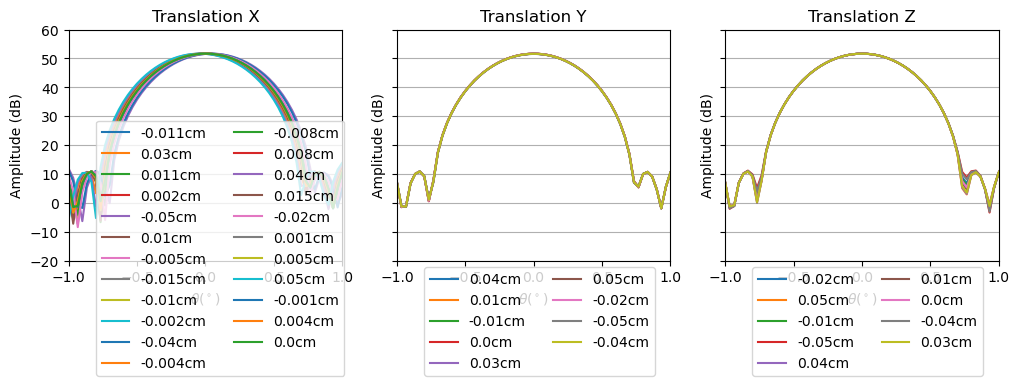

In [51]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
for ii, df in enumerate(dfs_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Translation X")
ax[0].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Translation Y")
ax[1].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_z):
    grasp.plot_beam_pattern(df, ax=ax[2], label=str(df_gain_z.Values[ii]) + "cm", norm=False);
ax[2].set_xlim([-1, 1])
ax[2].set_ylim([-20,60])
ax[2].set_title("Translation Z")
ax[2].legend(ncols=2, loc=(0.1, -0.5))
plt.show();

In [52]:
df_gain_x_s = df_gain_x.sort_values(by="Values")
df_gain_y_s = df_gain_y.sort_values(by="Values")
df_gain_z_s = df_gain_z.sort_values(by="Values")

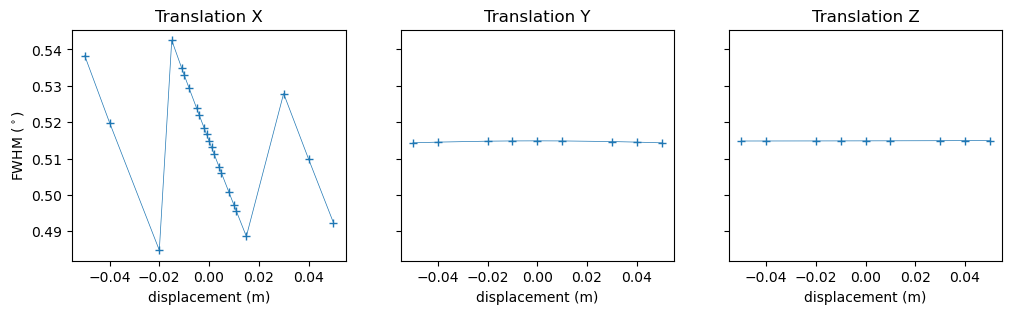

In [53]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 3), sharey=True)
ax[0].plot(df_gain_x_s.Values, df_gain_x_s.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_y_s.Values, df_gain_y_s.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z_s.Values, df_gain_z_s.FWHM * 2, marker="+", linewidth=0.5)
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

In [54]:
df_n_z = grasp.normalize(df_gain_z_s)
df_n_y = grasp.normalize(df_gain_y_s)
df_n_x = grasp.normalize(df_gain_x_s)

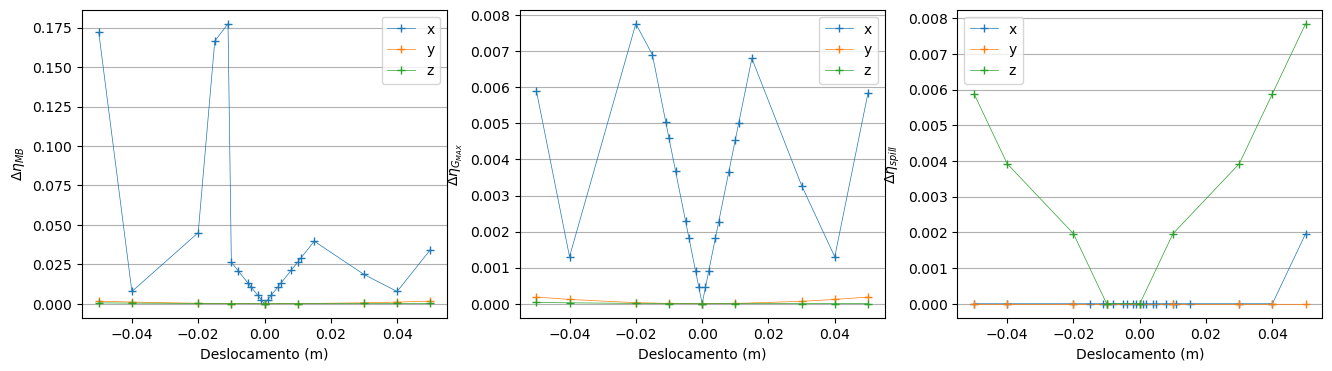

In [55]:
plot_mosaic(dfs = [df_n_x, df_n_y, df_n_z], variables=["delta_eta_MB", "delta_Gain_Max", "delta_Spill_Over"],
            xlabel="Deslocamento (m)", labels=["x", "y", "z"], 
            ylabels=[r"$\Delta \eta_{MB}$", r"$\Delta \eta_{G_{MAX}}$", r"$\Delta \eta_{spill}$"]);

### Rotações do Feed

In [36]:
df_gain_rot_x, dfs_rot_x = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_0_*_0/*.cut")
df_gain_rot_y, dfs_rot_y = grasp.load_cuts("../data/raw/grasp/job_central__feed_0_0_0_0_*/*.cut")

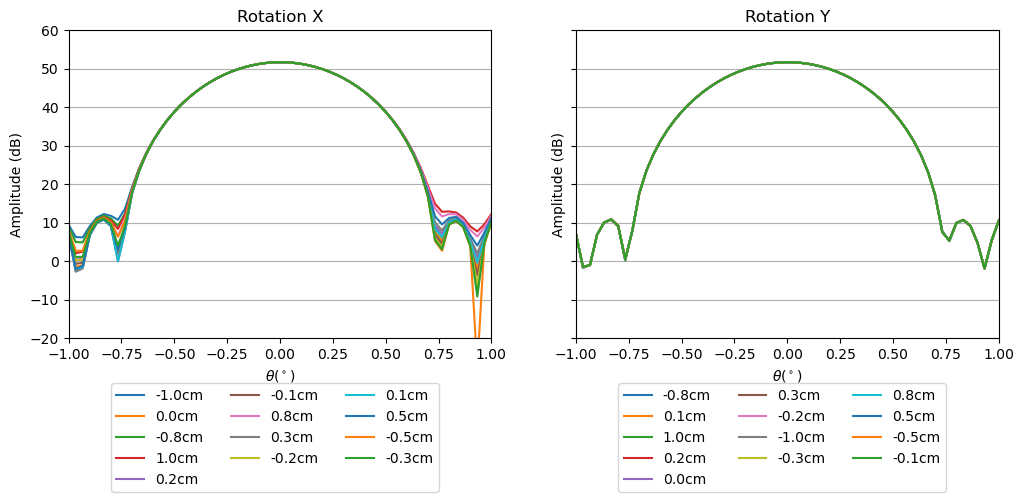

In [37]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
for ii, df in enumerate(dfs_rot_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_rot_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Rotation X")
ax[0].legend(ncols=3, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_rot_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_rot_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Rotation Y")
ax[1].legend(ncols=3, loc=(0.1, -0.5))
plt.show();

In [38]:
df_gain_rot_x_s = df_gain_rot_x.sort_values(by="Values")
df_gain_rot_y_s = df_gain_rot_y.sort_values(by="Values")

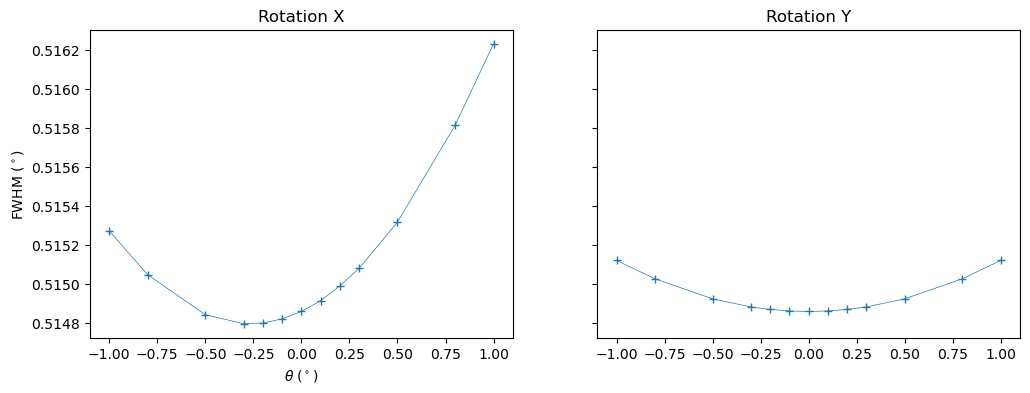

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_rot_x_s.Values, df_gain_rot_x_s.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Rotation X")
ax[0].set_xlabel(r"$\theta\;(^\circ)$")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_rot_y_s.Values, df_gain_rot_y_s.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Rotation Y")
ax[0].set_xlabel(r"$\theta\;(^\circ)$")
plt.show();

In [56]:
df_n_y_rot = grasp.normalize(df_gain_rot_x_s)
df_n_x_rot = grasp.normalize(df_gain_rot_y_s)

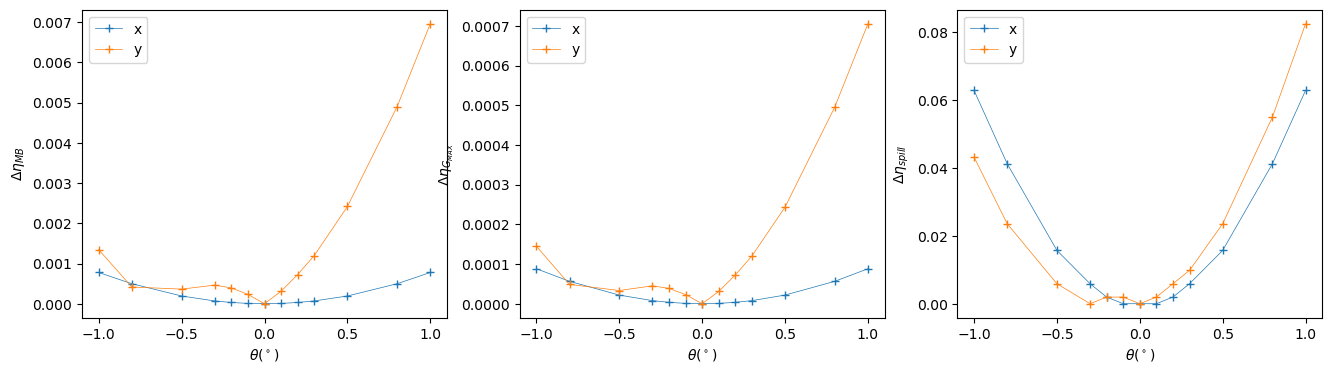

In [57]:
plot_mosaic(dfs = [df_n_x_rot, df_n_y_rot], variables=["delta_eta_MB", "delta_Gain_Max", "delta_Spill_Over"],
            xlabel=r"$\theta (^\circ)$", labels=["x", "y"], 
            ylabels=[r"$\Delta \eta_{MB}$", r"$\Delta \eta_{G_{MAX}}$", r"$\Delta \eta_{spill}$"]);

In [16]:
df_n_x_rot[df_n_x_rot.delta_Gain <=0.01].Values.max()
df_n_y_rot[df_n_y_rot.delta_Gain <=0.01].Values.max()

1.0

0.8

### Translações do Secundário

In [43]:
df_gain_sec_x, dfs_sec_x = grasp.load_cuts("../data/raw/grasp/job_central__secondary_*_0_0_0_0/*.cut")
df_gain_sec_y, dfs_sec_y = grasp.load_cuts("../data/raw/grasp/job_central__secondary_0_*_0_0_0/*.cut")
df_gain_sec_z, dfs_sec_z = grasp.load_cuts("../data/raw/grasp/job_central__secondary_0_0_*_0_0/*.cut")

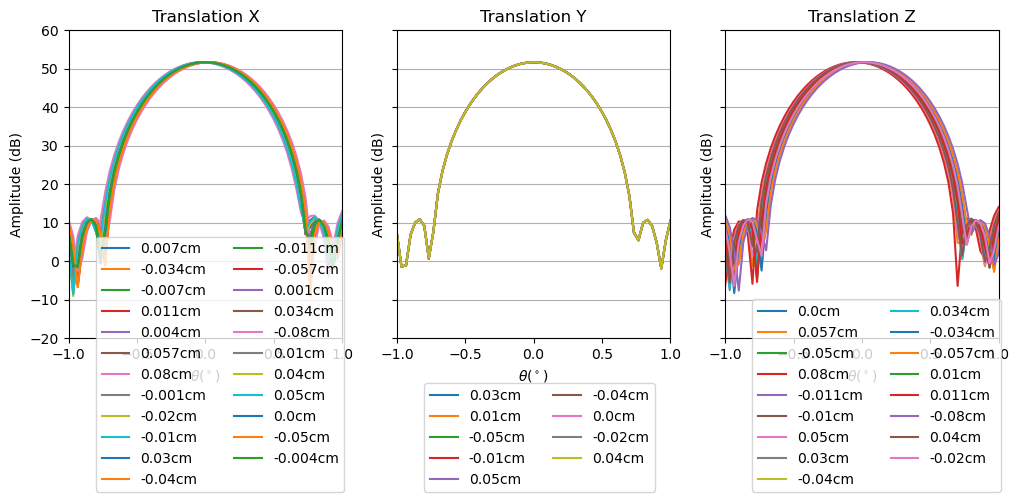

In [44]:
# Visualização da coleção de padrões de feixe.
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
for ii, df in enumerate(dfs_sec_x):
    grasp.plot_beam_pattern(df, ax=ax[0], label=str(df_gain_sec_x.Values[ii]) + "cm", norm=False);
ax[0].set_xlim([-1, 1])
ax[0].set_ylim([-20,60])
ax[0].set_title("Translation X")
ax[0].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_sec_y):
    grasp.plot_beam_pattern(df, ax=ax[1], label=str(df_gain_sec_y.Values[ii]) + "cm", norm=False);
ax[1].set_xlim([-1, 1])
ax[1].set_ylim([-20,60])
ax[1].set_title("Translation Y")
ax[1].legend(ncols=2, loc=(0.1, -0.5))
for ii, df in enumerate(dfs_sec_z):
    grasp.plot_beam_pattern(df, ax=ax[2], label=str(df_gain_sec_z.Values[ii]) + "cm", norm=False);
ax[2].set_xlim([-1, 1])
ax[2].set_ylim([-20,60])
ax[2].set_title("Translation Z")
ax[2].legend(ncols=2, loc=(0.1, -0.5))
plt.show();

In [45]:
df_gain_x_sec_s = df_gain_sec_x.sort_values(by="Values")
df_gain_y_sec_s = df_gain_sec_y.sort_values(by="Values")
df_gain_z_sec_s = df_gain_sec_z.sort_values(by="Values")

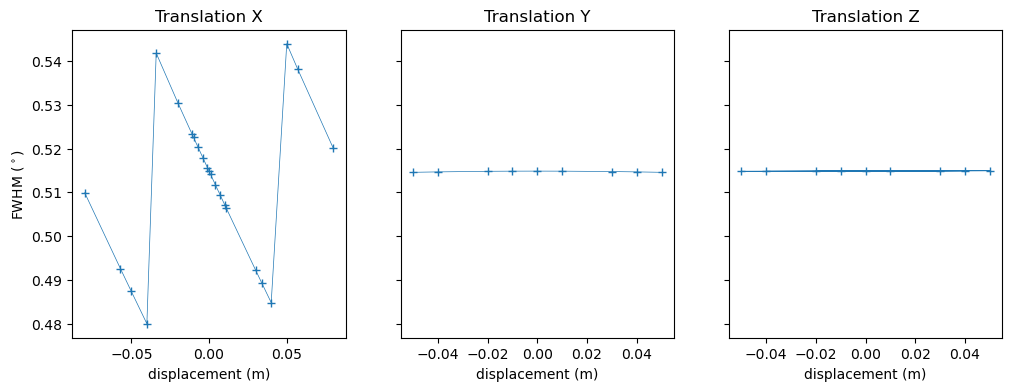

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
ax[0].plot(df_gain_x_sec_s.Values, df_gain_x_sec_s.FWHM * 2, marker="+", linewidth=0.5)
ax[0].set_title("Translation X")
ax[0].set_xlabel("displacement (m)")
ax[0].set_ylabel(r"FWHM $(^\circ)$")
ax[1].plot(df_gain_y_sec_s.Values, df_gain_y_sec_s.FWHM * 2, marker="+", linewidth=0.5)
ax[1].set_title("Translation Y")
ax[1].set_xlabel("displacement (m)")
ax[2].plot(df_gain_z.Values, df_gain_z.FWHM * 2, marker="+", linewidth=0.5)
ax[2].set_title("Translation Z")
ax[2].set_xlabel("displacement (m)")
plt.show();

In [58]:
df_n_z_sec = grasp.normalize(df_gain_z_sec_s)
df_n_y_sec = grasp.normalize(df_gain_y_sec_s)
df_n_x_sec = grasp.normalize(df_gain_x_sec_s)

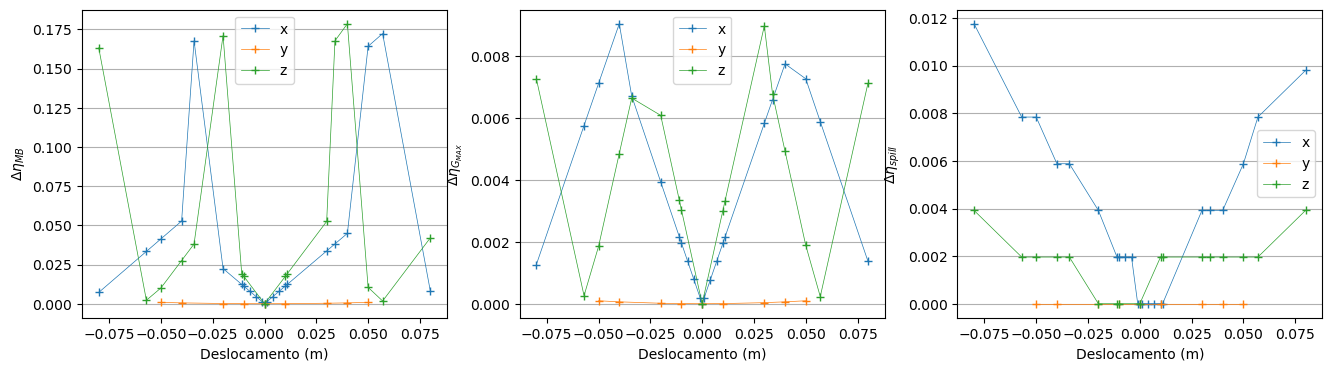

In [59]:
plot_mosaic(dfs = [df_n_x_sec, df_n_y_sec, df_n_z_sec], variables=["delta_eta_MB", "delta_Gain_Max", "delta_Spill_Over"],
            xlabel="Deslocamento (m)", labels=["x", "y", "z"], 
            ylabels=[r"$\Delta \eta_{MB}$", r"$\Delta \eta_{G_{MAX}}$", r"$\Delta \eta_{spill}$"]);

## Maximum Accepted Variation

In [61]:
def get_max_var(df, limit):
    max_mb = df[df.delta_eta_MB <= limit].Values.max()
    max_gmax = df[df.delta_Gain_Max <= limit].Values.max()
    max_spill = df[df.delta_Spill_Over <= limit].Values.max()
    result = np.min([max_mb, max_gmax, max_spill])
    return result

In [63]:
get_max_var(df_n_x, 0.01)
get_max_var(df_n_y, 0.01)
get_max_var(df_n_z, 0.01)
get_max_var(df_n_x_rot, 0.01)
get_max_var(df_n_y_rot, 0.01)
get_max_var(df_n_x_sec, 0.01)
get_max_var(df_n_y_sec, 0.01)
get_max_var(df_n_z_sec, 0.01)

0.04

0.05

0.05

0.3

0.3

0.08

0.05

0.057

## Conclusões

If we demand a variation less then 1% due to possible optics misalignement we constrain  the engineering accuracy with the following parameters:

| Type | Object | Axis | Accuracy |
|------|--------|------|----------|
| Translation | Feed | X | $<0.04$m|
| Translation | Feed | Y | $<0.05$m|
| Translation | Feed | Z | $<0.05$m|
| Translation | Secondary | X | $<0.08$m|
| Translation | Secondary | Y | $<0.05$m|
| Translation | Secondary | Z | $<0.06$m|
| Rotation | Feed | X | $<0.3^\circ$|
| Rotation | Feed | Y | $<0.3^\circ$|